In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../data/data.csv')
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [4]:
# Convert date to years months and days
data["date"] = pd.to_datetime(data["date"]).dt.to_period("D").astype(str)


In [5]:
# How many days distinct days we have
daily_counts = data.groupby("date").size().reset_index(name="count")
daily_counts.head()


,date,count
0,2014-05-02,67
1,2014-05-03,4
2,2014-05-04,5
3,2014-05-05,84
4,2014-05-06,83


In [36]:
from sklearn.preprocessing import LabelEncoder

first_50 = data.head(50).copy()

# Initialize label encoder
le = LabelEncoder()

for col in first_50.columns:
    if first_50[col].dtype == 'object':
        first_50[col] = le.fit_transform(first_50[col].astype(str))

correlation = first_50.corr()
correlation.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.537500,0.328938,0.585927,-0.007997,0.316703,NaN,0.615271,0.332994,0.513621,0.203397,-0.435851,0.016392,0.252749,0.264514,0.197478,NaN
bedrooms,NaN,0.537500,1.000000,0.507013,0.636547,0.211414,0.356171,NaN,0.195553,0.057522,0.632581,0.092169,-0.006956,0.137194,-0.083587,-0.132171,-0.127953,NaN
bathrooms,NaN,0.328938,0.507013,1.000000,0.740066,0.293256,0.505546,NaN,0.171516,0.025067,0.596050,0.347888,0.400038,-0.196070,0.038013,-0.181224,-0.185157,NaN
sqft_living,NaN,0.585927,0.636547,0.740066,1.000000,0.408447,0.446006,NaN,0.356315,0.063641,0.847200,0.397897,0.141798,-0.153925,0.040066,-0.186146,-0.100906,NaN


In [7]:
import seaborn as sns

<Axes: xlabel='price', ylabel='sqft_lot'>

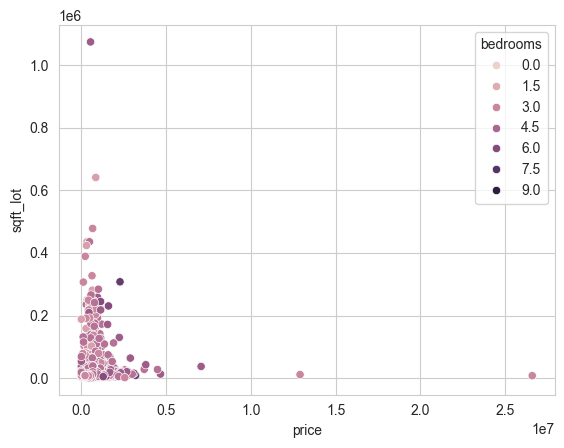

In [28]:
sns.scatterplot(x="price", y="bedrooms", data=data, hue="bedrooms")

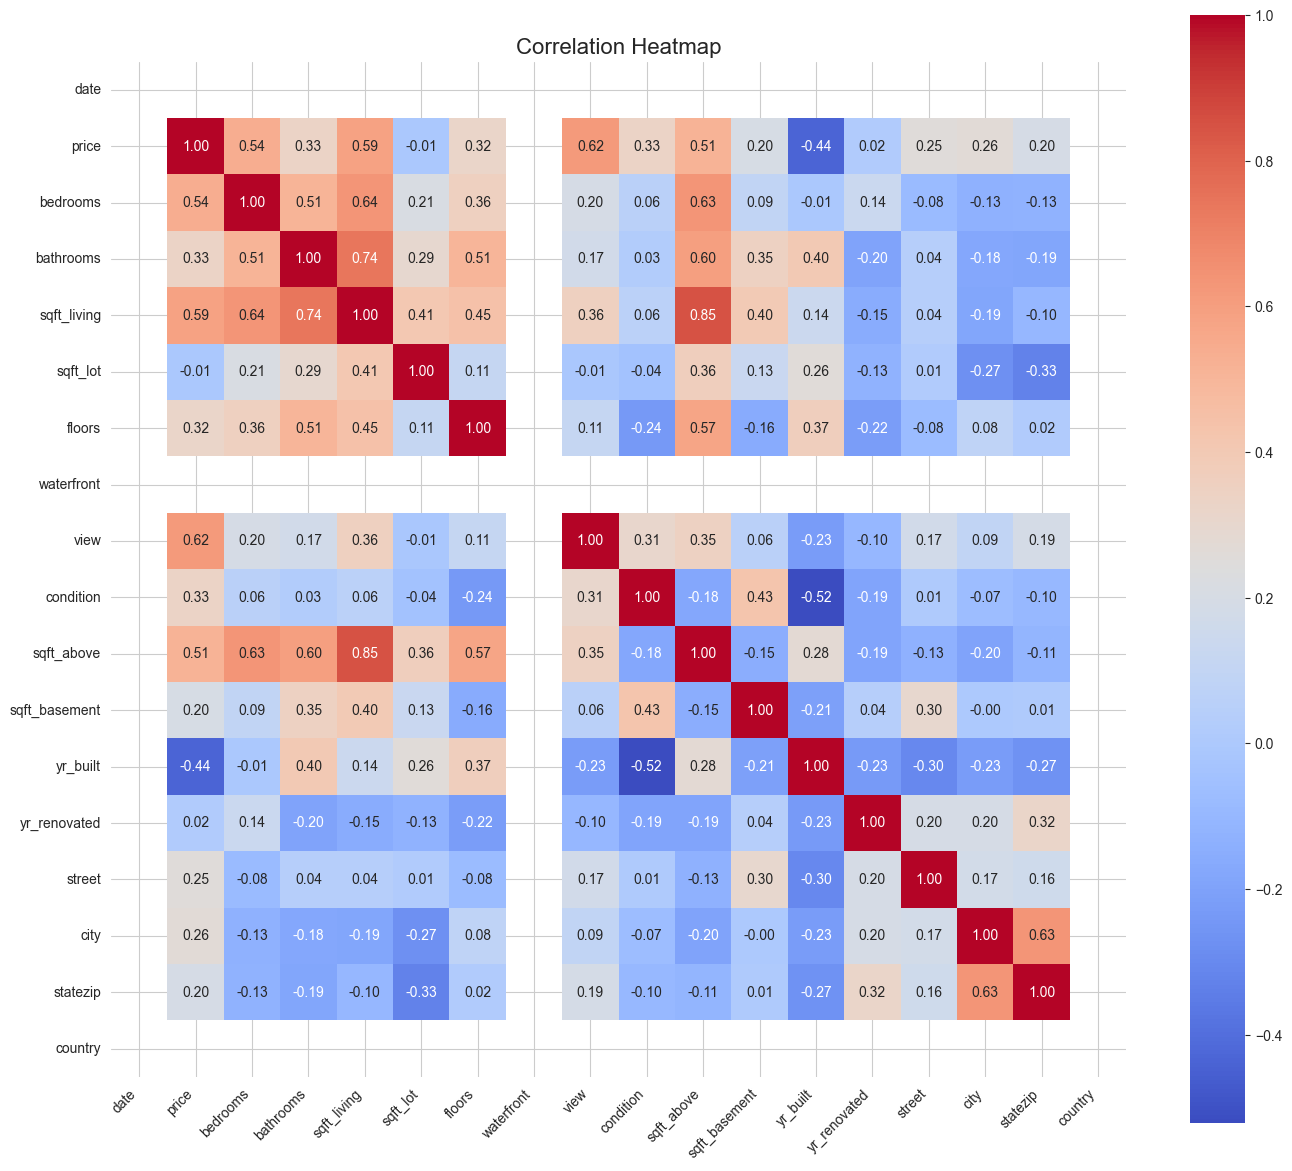

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 12))  # Increase width and height
sns.heatmap(data=correlation, annot=True, cmap="coolwarm", fmt=".2f", square=True)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()
